In [77]:
import pandas as pd
import matplotlib.pyplot as plt


In [54]:
# Replace 'file.csv' with your file path or name
df = pd.read_csv('data-2024-11-08.csv')

df['Population Impacted'] = df['Population Impacted'].str.replace(',', '').astype(float)
df['Estimated Potential Impact'] = df['Estimated Potential Impact'].str.replace(',', '').astype(float)

df.head()

,Year,Therapeutic Name,Eventual Brand Name,NDC Code,Active Pharmaceutical Ingredient,Gene Delivery System,Targeting Strategy,Delivery Method,NCT ID,Study URL,...,Entity Type,Entity Employee Count,Entity Size,Entity Research Status,Sponsor,Sponsor Type,Sponsor Class,Collaborators,Manufacturer,Treatment Cost
0,2024,2024-2025 formula,Comirnaty,NaN,messenger RNA,LNP,Untargeted,in-vivo,NCT06633835,https://clinicaltrials.gov/study/NCT06633835,...,INDUSTRY,"1,543",Small Pharma,False,Novavax,SPONSOR,INDUSTRY,"""University of Utah""",BioNTech SE,$136.75
1,2024,acne mRNA vaccine (ORI-001),NaN,NaN,messenger RNA,unclear,Untargeted,in-vivo,NCT06316297,https://clinicaltrials.gov/study/NCT06316297,...,INDUSTRY,"86,088",Big Pharma,True,"Sanofi Pasteur, a Sanofi Company",SPONSOR,INDUSTRY,NaN,"Sanofi Pasteur, a Sanofi Company",NaN
2,2021,ARCT-021,LUNAR-COV19,NaN,self-amplifying RNA,LNP,Untargeted,in-vivo,NCT05037097,https://clinicaltrials.gov/study/NCT05037097,...,INDUSTRY,180,Small Pharma,True,"Arcturus Therapeutics, Inc.",SPONSOR,INDUSTRY,NaN,"Arcturus Therapeutics, Inc.",NaN
3,2021,ARCT-021,LUNAR-COV19,NaN,self-amplifying RNA,LNP,Untargeted,in-vivo,NCT04668339,https://clinicaltrials.gov/study/NCT04668339,...,INDUSTRY,180,Small Pharma,True,"Arcturus Therapeutics, Inc.",SPONSOR,INDUSTRY,NaN,"Arcturus Therapeutics, Inc.",NaN
4,2021,ARCT-154,KOSTAIVE,NaN,self-amplifying RNA,unclear,Untargeted,in-vivo,NCT05037097,https://clinicaltrials.gov/study/NCT05037097,...,INDUSTRY,180,Small Pharma,True,"Arcturus Therapeutics, Inc.",SPONSOR,INDUSTRY,NaN,"Arcturus Therapeutics, Inc.",NaN


In [ ]:
print('Number of unique therpaies:', df['Therapeutic Name'].nunique())
print('Number of unique clinical trials:', df['NCT ID'].nunique())


Number of unique therpaies: 172
Number of unique clinical trials: 149


In [93]:
# Phase 4 and approved
ind = (df['Phase'] == 'Phase 4') # & (df['Trial Status'] == 'Completed')

# Unique therapies
print('Number of unique approved therapies:', df.loc[ind, 'Therapeutic Name'].nunique())

# Computing pop. impacted
pop_impact = (
    df.loc[ind, ['DIsease Targeted by Intervention', 'Estimated Potential Impact']]
    .drop_duplicates()
    .groupby('DIsease Targeted by Intervention', as_index=False)
    .agg({'Estimated Potential Impact': 'max'})
)

pop_impact['Estimated Potential Impact'] = pop_impact['Estimated Potential Impact'].apply(lambda x: f"{x:,.0f}")
pop_impact['Phase'] = 4
pop_impact = pd.merge(pop_impact, df[['DIsease Targeted by Intervention', 'Target Population Indicator']].drop_duplicates(), on='DIsease Targeted by Intervention', how='left')

print('Number of population impacted:')
display(pop_impact)
    
# display(df.loc[ind, ['Therapeutic Name', 'DIsease Targeted by Intervention']].drop_duplicates())
# display(df.loc[ind, ['Therapeutic Name', 'DIsease Targeted by Intervention', 'Eventual Brand Name', 'Age']].drop_duplicates())

# comirnaty® needs to be cleaned up.

Number of unique approved therapies: 27
Number of population impacted:


,DIsease Targeted by Intervention,Estimated Potential Impact,Phase,Target Population Indicator
0,COVID-19,"208,415,212",4,Common


In [74]:
# df.loc[ind, ['DIsease Targeted by Intervention', 'Age', 'Population Impacted']].drop_duplicates()
pop_impact

,DIsease Targeted by Intervention,Estimated Potential Impact,Phase
0,COVID-19,"208,415,212",4


In [94]:
# Phase 3 and not yet Phase 4

pop_impact_list = [pop_impact]

for ph in [3, 2, 1]:

    ind = (df['Phase'] == f'Phase {ph}') & (df['Trial Status'] != 'Completed')

    print('Number of unique therapies in Phase 3:', df.loc[ind, 'Therapeutic Name'].nunique())

    # Computing pop. impacted
    pop_impact = (
        df.loc[ind, ['DIsease Targeted by Intervention', 'Estimated Potential Impact', 'Target Population Indicator']]
        .drop_duplicates()
        .groupby('DIsease Targeted by Intervention', as_index=False)
        .agg({'Estimated Potential Impact': 'max'})
    )

    pop_impact['Estimated Potential Impact'] = pop_impact['Estimated Potential Impact'].apply(lambda x: f"{x:,.0f}")
    pop_impact['Phase'] = ph
    pop_impact = pd.merge(pop_impact, df[['DIsease Targeted by Intervention', 'Target Population Indicator']].drop_duplicates(), on='DIsease Targeted by Intervention', how='left')

    # print('Number of population impacted:')
    # display(pop_impact)

    pop_impact_list.append(pop_impact)

# Combine all phase DataFrames into a single DataFrame
combined_pop_impact = pd.concat(pop_impact_list, ignore_index=True)

# Display the combined DataFrame
display(combined_pop_impact)

Number of unique therapies in Phase 3: 9
Number of unique therapies in Phase 3: 47
Number of unique therapies in Phase 3: 26


,DIsease Targeted by Intervention,Estimated Potential Impact,Phase,Target Population Indicator
0,COVID-19,"208,415,212",4,Common
1,COVID-19,"208,415,212",3,Common
2,Cytomegalovirus Infection,"57,490,313",3,Common
3,Lung Cancer,"455,123",3,Common
4,Melanoma,"894,673",3,Common
5,Non-melanoma skin cancer (squamous-cell carcin...,"1,453,436",3,Common
6,Norovirus,"197,213,032",3,Common
7,Respiratory Syncytial Virus,"208,415,212",3,Rare
8,Acne,"9,478,887",2,Common
9,Brain and central nervous system cancer,"106,930",2,Rare


In [99]:
combined_pop_impact[['DIsease Targeted by Intervention', 'Target Population Indicator']].drop_duplicates().groupby('Target Population Indicator').value_counts()

Target Population Indicator  DIsease Targeted by Intervention                  
Common                       Acne                                                  1
                             Breast Cancer                                         1
                             COVID-19                                              1
                             Cancer                                                1
                             Cytomegalovirus Infection                             1
                             Epstein-Barr Virus                                    1
                             HIV                                                   1
                             Head and Neck Cancer                                  1
                             Herpes                                                1
                             Influenza                                             1
                             Kidney Cancer                            

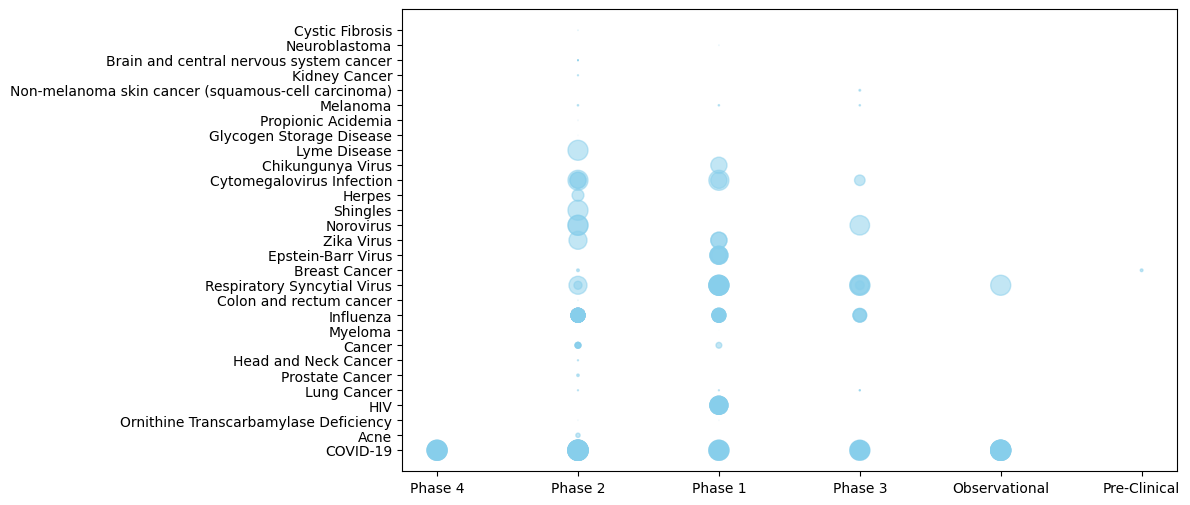

In [83]:
plt.figure(figsize=(10, 6))
plt.scatter(
    x=df['Phase'],
    y=df['DIsease Targeted by Intervention'],
    s=df['Estimated Potential Impact'] / 1000000,  # Scale bubble size
    alpha=0.5,
    color='skyblue',
    edgecolor='skyblue'
)